# Indian Elections 2014 Statistics


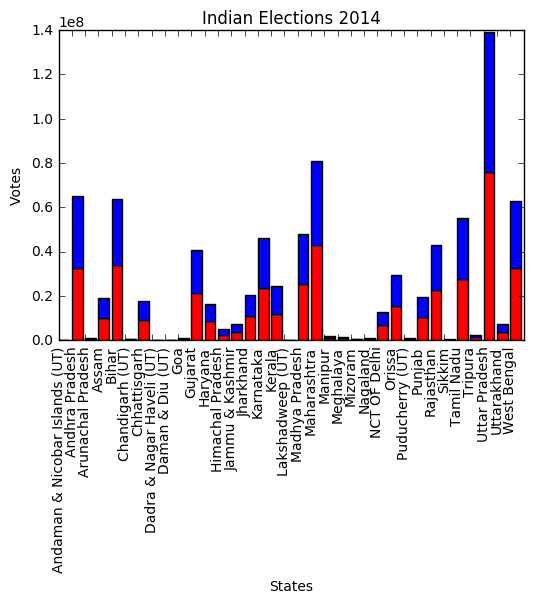

In [43]:
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

def read_page():
  request = urllib.request.urlopen('https://en.wikipedia.org/wiki/Indian_general_election,_2014').read()
  page = BeautifulSoup(request,'lxml')
  return page  

def extract_data(soup):
  tables = soup.find_all('table', attrs={'class': 'wikitable'}) 
  turnout_table = tables[4].prettify()
  df = pd.read_html(turnout_table,header=0)
  return df[0][:-1]


page = read_page()
data = extract_data(page)


x = list(range(len(states)))
m = data['Male Electors']
f = data['Female Electors']
states = data['State/UT'].tolist()

plt.bar(x,m,color="red")
plt.bar(x,f,bottom=m,color="blue")
plt.title("Indian Elections 2014")
plt.xlabel("States")
plt.ylabel("Votes")
plt.xticks(x ,states,rotation='vertical')
plt.gca().get_yaxis().get_major_formatter().set_powerlimits((0, 0))
plt.show()

